Antonio Fernandes Valadares - 11711ECP015 \
Computação Evolutiva \
Universidade Federal de Uberlândia - Engenharia de computação \
Professor: Keiji Yamanaka \
Trabalho 8 : Evolução diferencial

In [1]:
def f(x):
  soma = 0
  for i in range(len(x) - 1):
    soma += ((1 - x[i])**2) + (100 * (x[i+1] - x[i]**2)**2)
  return soma

In [2]:
f([1, 0, 0, 0, 0])

103

In [3]:
f([1, 1, 1, 1, 1]), f([0, 0, 0, 0, 0, 0])

(0, 5)

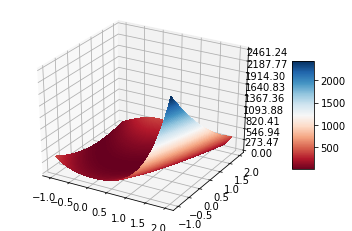

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from pylab import meshgrid


x1 = np.arange(-1, 2, 0.01)
x2 = np.arange(-1, 2, 0.01)
X,Y = meshgrid(x1,x2)
Z = f([X,Y])

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [5]:
import numpy as np

def initial_population(size, n):
  population = (3)*np.random.rand(size, n) - 1

  return population

In [6]:
initial_population(20, 5)

array([[-0.85148676,  1.43083361,  1.57765119,  0.10455944,  1.01561563],
       [ 0.55261071,  0.37605304,  1.81813482,  1.31241302,  1.20460332],
       [-0.40873223,  1.7792362 ,  0.5445407 ,  0.41552389, -0.19638539],
       [-0.46959752,  0.92293163, -0.97421856,  1.84859277,  1.17135844],
       [ 0.71786799, -0.84214473,  1.36842448, -0.85975753,  0.31295325],
       [-0.0814952 ,  0.60143265,  1.27379286,  0.51684268, -0.23276466],
       [ 1.92105137,  1.038566  ,  0.39704943,  0.72166189,  1.47939721],
       [-0.39923076,  0.98104864, -0.79750652,  0.83396349,  0.09618252],
       [ 1.20169177, -0.33299674,  1.81236219,  0.51126607,  1.7996035 ],
       [ 0.78732223,  1.91749923,  1.65974851, -0.30389507,  0.66918469],
       [ 0.36901191,  0.29640683,  1.13913945,  1.030933  ,  0.16394621],
       [ 1.62722892,  0.60372373,  0.02726424,  1.49999755,  1.8170451 ],
       [ 1.53207518,  0.71519688,  0.64997709,  0.99906476,  1.76415319],
       [-0.19949445,  1.44890815,  1.7

In [7]:
def fitness(population):
  fitness = []
  fitness.append([f(xi) for xi in population])

  population = np.column_stack((population, np.array(fitness).reshape(population.shape[0])))
  population = population[np.argsort(population[:,-1])]

  return population

In [8]:
pop = initial_population(size=10, n=2)
fitness(population=pop)

array([[-4.69716570e-01,  2.12653846e-01,  2.16643453e+00],
       [-8.54849050e-02,  2.70405492e-01,  8.10032392e+00],
       [ 8.19156261e-01,  1.26851094e+00,  3.57326081e+01],
       [ 2.30457478e-01, -6.67413640e-01,  5.25077209e+01],
       [-5.25115367e-01,  1.04729563e+00,  6.18548366e+01],
       [ 2.64348115e-01,  1.01413506e+00,  8.97029598e+01],
       [-7.07243468e-01, -7.66811917e-01,  1.63444908e+02],
       [-8.81735416e-01, -6.12497839e-01,  1.96738469e+02],
       [-2.69400900e-01,  1.69192691e+00,  2.63840841e+02],
       [ 1.04819903e+00, -6.38585061e-01,  3.01825630e+02]])

In [9]:
def crossover(population, size, F=0.5, cr=0.9):
  new_pop = []

  for xi in population:
    Xr = (np.random.choice(np.arange(0, size), size=3))

    vi = population[Xr[0]] + F * (population[Xr[1]]-population[Xr[2]])

    ui = []
    k = np.random.randint(len(xi))
    for i in range(len(xi)):
      if i == k:
        ui.append(xi[i])
      elif (np.random.random() < cr):
        ui.append(xi[i])
      else:
        ui.append(vi[i])

    if(f(xi) < f(ui)):
      new_pop.append(list(xi))
    else:
      new_pop.append(ui)

  return np.array(new_pop)

In [10]:
pop = initial_population(size=5, n=5)
pop

array([[ 1.71893338,  0.91539345,  0.79001198, -0.18485534,  0.38361384],
       [ 0.44438897,  0.35170294,  0.31450441,  1.86676144,  1.60823723],
       [ 1.79001394,  0.84678768,  0.05909657,  0.15686223,  0.43108617],
       [ 1.15769163, -0.2573127 ,  1.86573194,  0.71398793,  0.02432644],
       [ 1.43058812, -0.41468125, -0.96085085,  1.22804749,  0.79106799]])

In [11]:
crossover(pop, 5, cr=0.5)

array([[ 1.71893338,  0.91539345,  0.79001198, -0.18485534,  0.38361384],
       [ 0.44438897,  0.35170294,  0.31450441,  1.86676144,  1.60823723],
       [ 1.79001394,  0.84678768,  0.05909657,  0.15686223,  0.43108617],
       [ 1.15769163, -0.2573127 ,  1.86573194,  0.71398793,  0.02432644],
       [ 0.8010403 ,  0.04719512, -0.96085085,  1.22804749,  0.81628184]])

In [44]:
def mutacao(population, mutation_rate=0.01):


  for element in population[1:]:
    if(np.random.random() <  mutation_rate):
      i = np.random.randint(len(element))
      
      element[i] = 3*np.random.random() - 1

  return population

In [43]:
pop[1:]

array([[ 0.44438897,  0.35170294,  1.3619113 ,  1.86676144,  1.60823723],
       [ 1.79001394,  0.84678768, -0.4232509 ,  0.15686223,  0.43108617],
       [ 1.15769163, -0.2573127 ,  1.86573194,  0.71398793, -0.765695  ],
       [ 1.43058812, -0.41468125, -0.96085085,  1.22804749,  0.30451004]])

In [24]:
mutacao(pop, mutation_rate=1)

array([[ 1.71893338,  0.91539345,  0.79001198, -0.18485534, -0.39900679],
       [ 0.44438897,  0.35170294,  1.3619113 ,  1.86676144,  1.60823723],
       [ 1.79001394,  0.84678768, -0.4232509 ,  0.15686223,  0.43108617],
       [ 1.15769163, -0.2573127 ,  1.86573194,  0.71398793, -0.765695  ],
       [ 1.43058812, -0.41468125, -0.96085085,  1.22804749,  0.30451004]])

In [48]:
def evolucao_diferencial(geracoes=100, mutation_rate=0.05, size=100, cr=0.9, F=0.5, n=5):
  pop = initial_population(size=size, n=n)

  result = []
  result_media = []
  for _ in range(geracoes):
    pop = crossover(pop, size=size, F=F, cr=cr)
    #pop = mutacao(pop, mutation_rate=mutation_rate)

    fit = fitness(pop)[-1]
    result.append(fit[1])
    result_media.append(np.mean(fit))

  pop = fitness(pop)
  return pop, result, result_media

In [53]:
resultado, fit, fit_m = evolucao_diferencial(geracoes=10000, n=5, cr=0.9, F=0.5, size=100)

In [54]:
import pandas as pd

resultados = pd.DataFrame()

for i in range(resultado.shape[1] - 1):
  resultados[f'x{i}'] = resultado[:,i]

resultados['fitness'] = resultado[:,-1]
resultados.head()

,x0,x1,x2,x3,x4,fitness
0,0.997723,0.995884,0.991551,0.985007,0.970836,0.000715
1,1.002225,1.005118,1.010494,1.020359,1.042674,0.000897
2,1.002551,1.005953,1.010580,1.019613,1.038129,0.001290
3,0.995435,0.989953,0.982267,0.966930,0.936144,0.002704
4,0.998269,0.998898,0.997498,0.990061,0.979851,0.003128


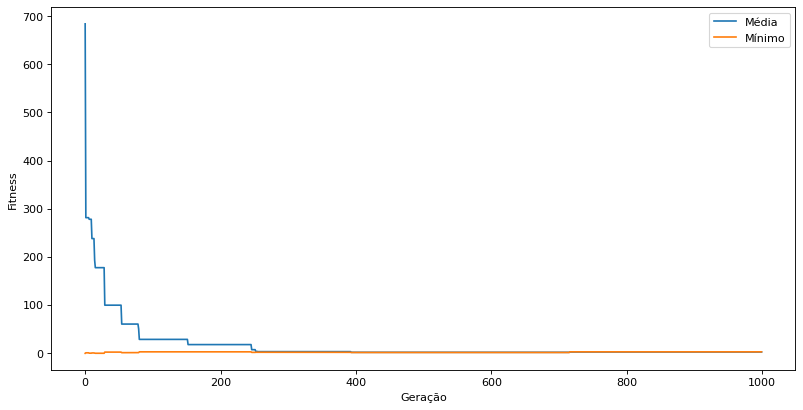

In [52]:
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=80)

plt.plot(fit_m, label='Média');
plt.plot(fit, label='Melhor resultado');

plt.legend(['Média', 'Mínimo'])
plt.xlabel("Geração")
plt.ylabel("Fitness")

plt.show();